In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7740 - loss: 0.6551 - val_accuracy: 0.8559 - val_loss: 0.4088
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8599 - loss: 0.3924 - val_accuracy: 0.8624 - val_loss: 0.3744
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8734 - loss: 0.3454 - val_accuracy: 0.8608 - val_loss: 0.3853
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8814 - loss: 0.3214 - val_accuracy: 0.8719 - val_loss: 0.3567
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8891 - loss: 0.2996 - val_accuracy: 0.8733 - val_loss: 0.3525


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test. accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.3773
Test. accuracy: 0.86


In [13]:
import numpy as np

In [14]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


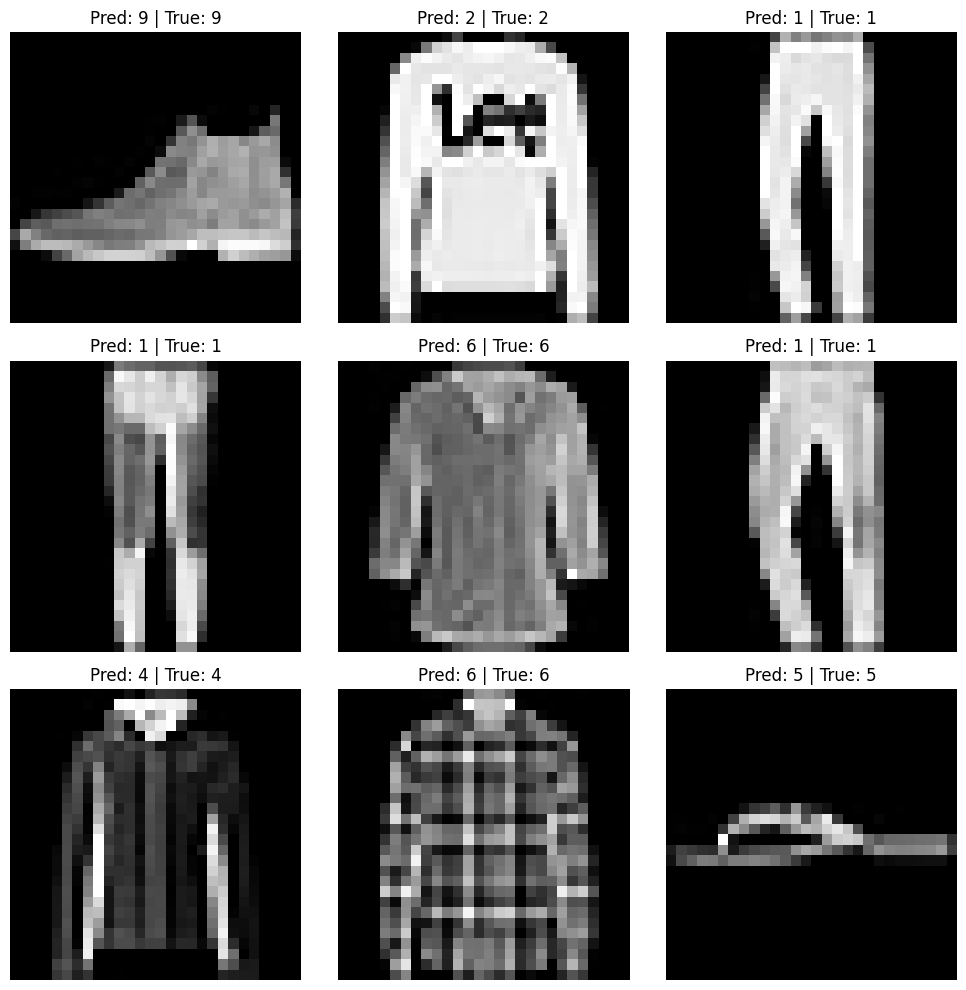

In [17]:
plt.figure(figsize = (10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_test[i], cmap = 'grey')
  plt.title(f"Pred: {predicted_labels[i]} | True: {y_test[i]}")
  plt.axis("off")
plt.tight_layout()
plt.show()